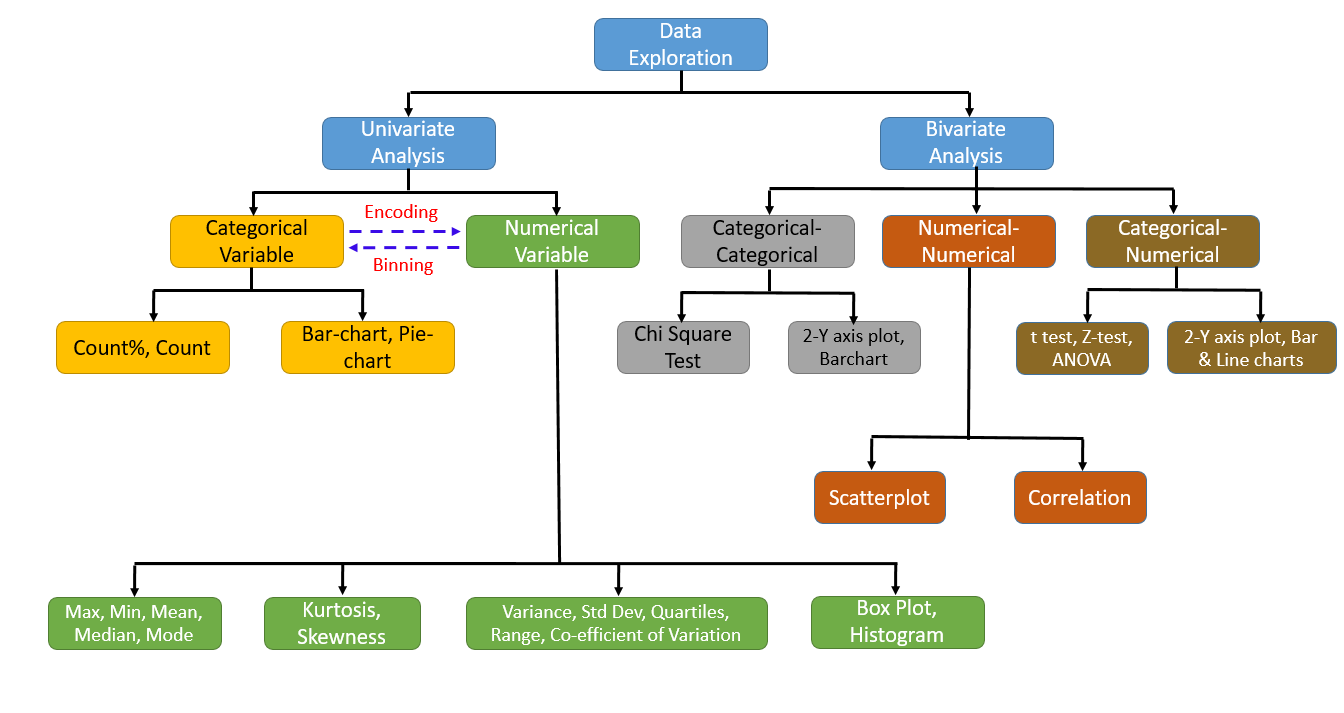

In [6]:
from IPython.display import Image
Image(filename="download.png")
#image Refference:nitinkaushik01

In [52]:
# standard imports 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Univariate Analysis

### Categorical Variables

A categorical variable is a variable that may take on one of a set of labels.

In [8]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### check data types 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   150 non-null    int64   
 1   SepalLengthCm        150 non-null    float64 
 2   SepalWidthCm         150 non-null    float64 
 3   PetalLengthCm        150 non-null    float64 
 4   PetalWidthCm         150 non-null    float64 
 5   Species              150 non-null    object  
 6   SepalLengthCm_Range  150 non-null    category
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 7.5+ KB


#### Count 

In statistics, count data is a statistical data type, a type of data in which the observations can take only the non-negative integer values {0, 1, 2, 3, ...}, and where these integers arise from counting rather than ranking.

In [9]:
# using group by 
df.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [10]:
# usingpandas value_counts
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [55]:
freq_table = df.groupby(['Species']).size().reset_index(name='Count').rename(columns={'Sepcies':'Species'})
freq_table

,Species,Count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


#### count % 

In [13]:
freq_table['Count%'] = freq_table['Count']/sum(freq_table['Count'])*100
freq_table


,Species,Count,Count%
0,Iris-setosa,50,33.333333
1,Iris-versicolor,50,33.333333
2,Iris-virginica,50,33.333333


#### Barchart 

A bar chart is a graphical representation of the categories as bars. A bar chart can be plotted vertically or horizontally.

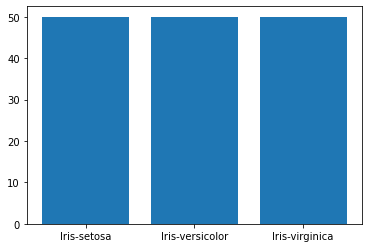

In [12]:

plt.bar(freq_table['Species'], freq_table['Count'])
plt.show()

### Numerical  Variables 

#### mean 

The mean is the average of a data set.

In [14]:
df["SepalWidthCm"].mean()

3.0540000000000007

#### maximum

Largest observation

In [15]:
df["SepalWidthCm"].max()

4.4

#### minimum

Smallest observation

In [16]:
df["SepalWidthCm"].min()

2.0

#### median 

The median is found by ordering the set from lowest to highest and finding the exact middle

In [17]:
df["SepalWidthCm"].median()

3.0

#### mode 

The mode is the most common number in a data set.

In [18]:
df["SepalWidthCm"].mode()

0    3.0
dtype: float64

#### Descriptive statistics 

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [19]:
df["SepalWidthCm"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

#### Histogram 

A histogram is an approximate representation of the distribution of numerical data

Text(0, 0.5, 'count')

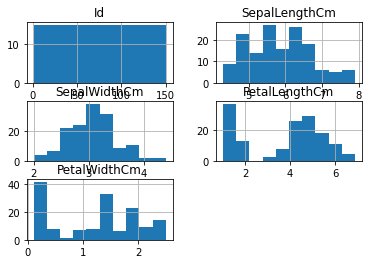

In [20]:

df.hist()
plt.title("yeap")
plt.xlabel('width')
plt.ylabel('count')


#### Box plot 

method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles,

Text(0, 0.5, 'count')

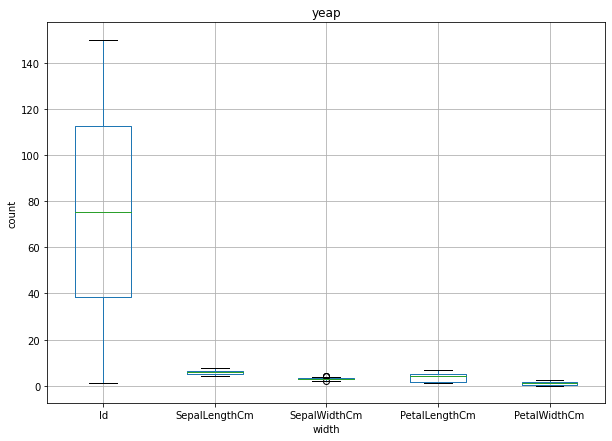

In [21]:
plt.figure(figsize = (10,7))
df.boxplot()
plt.title("yeap")
plt.xlabel('width')
plt.ylabel('count')


### Convert numerical variable to  categorical variable

#### Binning 

Binning is a way to group a number of more or less continuous values into a smaller number of "bins". 

Data binning is a data pre-processing technique used to reduce the effects of minor observation errors. The original data values which fall into a given small interval, a bin, are replaced by a value representative of that interval, often the central value. It is a form of quantization

In [22]:
sepal_length_ranges = ["[{0} - {1})".format(SepalLengthCm, SepalLengthCm + 1.0) for SepalLengthCm in range(4, 8, 1)]
sepal_length_ranges

['[4 - 5.0)', '[5 - 6.0)', '[6 - 7.0)', '[7 - 8.0)']

In [23]:
count_sepal_length_ranges = len(sepal_length_ranges)
count_sepal_length_ranges

4

In [58]:
df['SepalLengthCm_Range'] = pd.cut(x=df['SepalLengthCm'], bins=count_sepal_length_ranges, labels=sepal_length_ranges)

In [59]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_Range
0,1,5.1,3.5,1.4,0.2,Iris-setosa,"(4.296, 5.2]"
1,2,4.9,3.0,1.4,0.2,Iris-setosa,"(4.296, 5.2]"
2,3,4.7,3.2,1.3,0.2,Iris-setosa,"(4.296, 5.2]"
3,4,4.6,3.1,1.5,0.2,Iris-setosa,"(4.296, 5.2]"
4,5,5.0,3.6,1.4,0.2,Iris-setosa,"(4.296, 5.2]"


In [26]:
sepal_len_hist_df = df['SepalLengthCm_Range'].value_counts()
sepal_len_hist_df

[5 - 6.0)    50
[4 - 5.0)    45
[6 - 7.0)    43
[7 - 8.0)    12
Name: SepalLengthCm_Range, dtype: int64

In [27]:
df_range_hist = pd.DataFrame(sepal_len_hist_df).reset_index()
df_range_hist.columns = ['SepalLengthCm_Range', 'Count']
df_range_hist

,SepalLengthCm_Range,Count
0,[5 - 6.0),50
1,[4 - 5.0),45
2,[6 - 7.0),43
3,[7 - 8.0),12


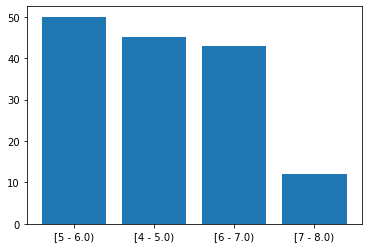

In [28]:

plt.bar(df_range_hist["SepalLengthCm_Range"], df_range_hist["Count"])
plt.show()

#  Bi-Variate Analysis



### Numerical-Numerical Variable Analysis

#### Scatter Plot

A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.

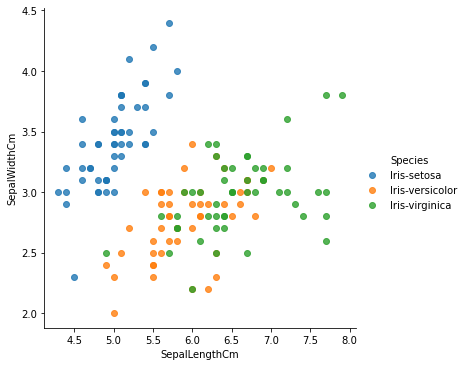

In [29]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', fit_reg=False, data=df)


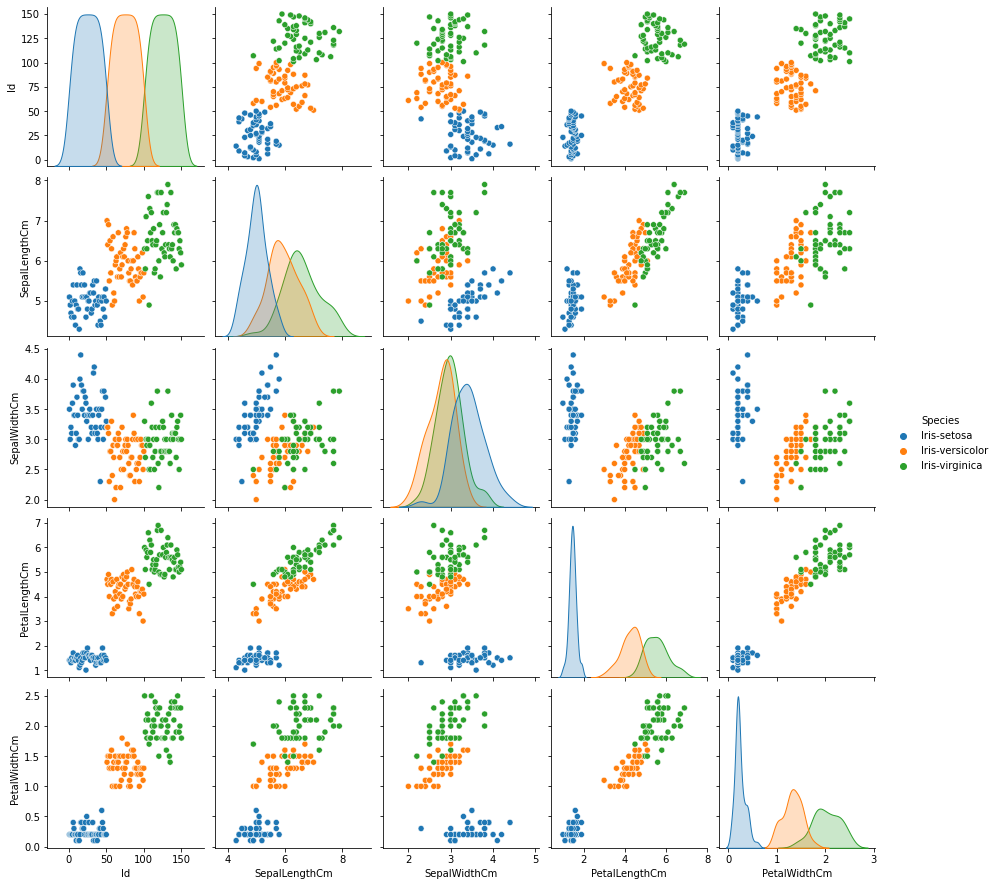

In [30]:
#Scatter Plot Matrix
sns.pairplot(hue='Species', data=df)

#### Correlation 

* Correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. 
* In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related  (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

Correlation coefficients are used to measure the strength of the linear relationship between two variables.

* A correlation coefficient greater than zero indicates a positive relationship while a value less than zero signifies a negative relationship

* A value of zero indicates no relationship between the two variables being compared.

* A negative correlation, or inverse correlation, is a key concept in the creation of diversified portfolios that can better withstand portfolio volatility.

* Calculating the correlation coefficient is time-consuming, so data are often plugged into a calculator, computer, or statistics program to find the coefficient.

In [31]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Categorical-Categorical Variable Analysis

In [32]:
df2 = pd.read_csv('Train.csv')
df2.head()
#df_plot = df.groupby(['Color', 'Species']).size().reset_index().pivot(columns='Color', index='Species', values=0)
#df_plot.plot(x=df_plot.index, kind='bar', stacked=True)

#pd.crosstab(df.Species,df.Color)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### crosstab

Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [33]:
pd.crosstab(df2.Item_Type,df2.Outlet_Size)

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,73,203,187
Breads,25,83,71
Breakfast,13,36,30
Canned,65,217,189
Dairy,80,218,198
Frozen Foods,92,274,249
Fruits and Vegetables,142,413,328
Hard Drinks,23,75,50
Health and Hygiene,61,170,136


#### Barchart 

<AxesSubplot:xlabel='Outlet_Size,Item_Type'>

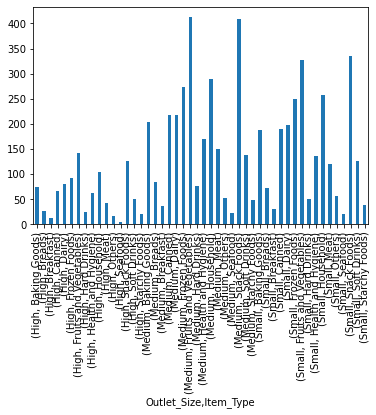

In [34]:
df_plot = df2.groupby(['Outlet_Size', 'Item_Type']).size()
df_plot.plot(x=df_plot.index, kind='bar', stacked=True)


In [35]:
df_mean = df.groupby(['Species']).mean().reset_index()
df_mean


,Species,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,25.5,5.006,3.418,1.464,0.244
1,Iris-versicolor,75.5,5.936,2.770,4.260,1.326
2,Iris-virginica,125.5,6.588,2.974,5.552,2.026


#### 2- Y Axis plot 

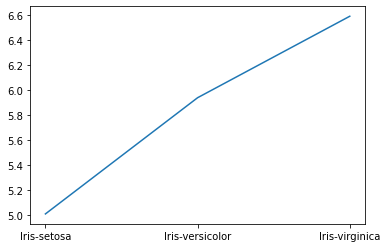

In [36]:

plt.plot(df_mean['Species'], df_mean['SepalLengthCm'])

#### Chi Square Test   Relationships between categorical variables (contingency tables).

The chi-squared statistic is a single number that tells you how much difference exists between your observed counts and the counts you would expect if there were no relationship at all in the population. ... A low value for chi-square means there is a high correlation between your two sets of data.

A chi-square test for independence compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.

A chi square test will give you a p-value. The p-value will tell you if your test results are significant or not

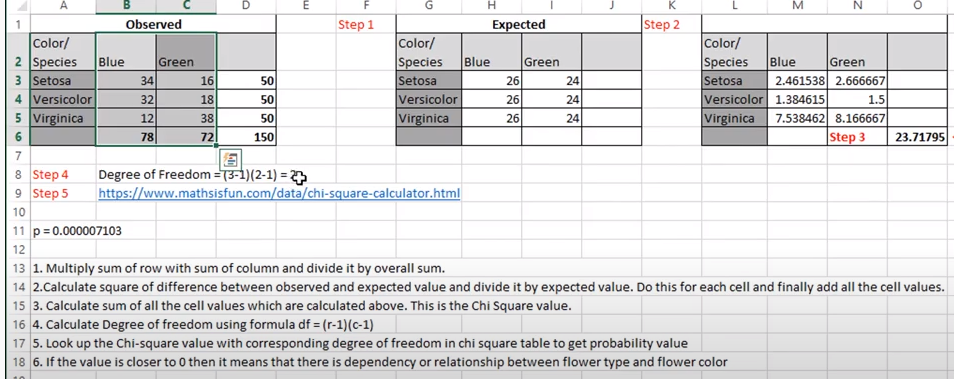

In [49]:
Image(filename="chi.png")

#### Z Test  

Z-test is a statistical test to determine whether two population means are different when the variances are known and the sample size is larg

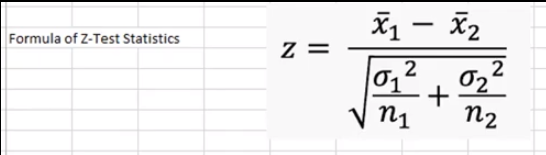

In [48]:
Image(filename="z score.png")

In [37]:
df_mean = df.groupby(['Species']).mean().reset_index()
df_var = df.groupby(['Species']).var().reset_index()
z = (5.006 - 5.936)/np.sqrt(np.square(0.1242)/50 + np.square(0.266433)/50)
z


-22.37074570814338

https://www.socscistatistics.com/pvalues/normaldistribution.aspx

#### T  test

A t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another

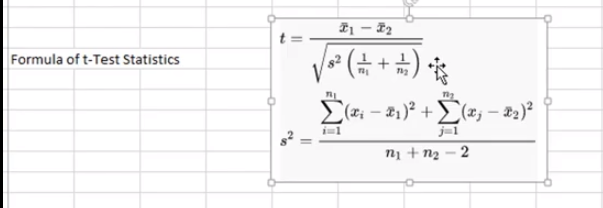

In [51]:
Image(filename="t score.png")

### Numerical-Categorical Variable Analysis

In [38]:
df_mean = df.groupby(['Species']).mean().reset_index().drop(['Id'], axis=1).add_prefix('mean_')
df_var = df.groupby(['Species']).var().reset_index().drop(['Id','Species'], axis=1).add_prefix('var_')
df_count = df.groupby(['Species']).count().reset_index().drop(['Id', 'Species'], axis=1).add_prefix('count_')
pd.concat([df_mean, df_var, df_count], axis=1)


,mean_Species,mean_SepalLengthCm,mean_SepalWidthCm,mean_PetalLengthCm,mean_PetalWidthCm,var_SepalLengthCm,var_SepalWidthCm,var_PetalLengthCm,var_PetalWidthCm,count_SepalLengthCm,count_SepalWidthCm,count_PetalLengthCm,count_PetalWidthCm,count_SepalLengthCm_Range
0,Iris-setosa,5.006,3.418,1.464,0.244,0.124249,0.145180,0.030106,0.011494,50,50,50,50,50
1,Iris-versicolor,5.936,2.770,4.260,1.326,0.266433,0.098469,0.220816,0.039106,50,50,50,50,50
2,Iris-virginica,6.588,2.974,5.552,2.026,0.404343,0.104004,0.304588,0.075433,50,50,50,50,50


#### Anova  Analysis of variance

is a statistical method that separates observed variance data into different components to use for additional tests. A one-way ANOVA is used for three or more groups of data, to gain information about the relationship between the dependent and independent variables.

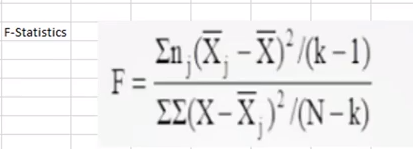

In [42]:
Image(filename="fscore.png")

In [39]:
k=3
N = 50+50+50
Numerator = np.sum([np.square(5.006-5.843)/(k-1), np.square(5.936-5.843)/(k-1), np.square(6.588-5.843)/(k-1)])
Numerator

0.6321214999999999

In [40]:
Setosa = np.sum(np.square(df[df['Species'] == 'Iris-setosa'].SepalLengthCm - 5.006)/(N-k))
Versicolor = np.sum(np.square(df[df['Species'] == 'Iris-versicolor'].SepalLengthCm - 5.936)/(N-k))
Verginica = np.sum(np.square(df[df['Species'] == 'Iris-virginica'].SepalLengthCm - 6.588)/(N-k))
Denominator = Setosa+Versicolor+Verginica
Denominator

0.26500816326530613

In [41]:

F = Numerator/Denominator
F

2.3852906726015366

#Link to Calculate F-Statistics
http://onlinestatbook.com/2/calculators/F_dist.html